## Генетический алгоритм
_________
#### Генетический алгоритм (GA) - это эволюционный алгоритм (EA), вдохновленный теорией естественного отбора Чарльза Дарвина, которая поддерживает выживание наиболее приспособленных. Согласно теории естественного отбора, наиболее приспособленные особи отбираются для получения потомства. Характеристики наиболее приспособленных родителей затем передаются их потомкам с помощью скрещивания и мутации, чтобы обеспечить лучшие шансы на выживание. Генетические алгоритмы - это алгоритмы рандомизированного поиска, которые генерируют высококачественные оптимизационные решения, имитируя биологически вдохновленный процесс естественного отбора, такой как отбор, скрещивание и мутация.

### Терминология для генетического алгоритма
![](https://miro.medium.com/max/695/1*vIrsxg12DSltpdWoO561yA.png)
#### **Популяция** содержит набор возможных решений для начала процесса стохастического поиска. GA будет выполнять итерацию по нескольким поколениям, пока не найдет приемлемое и оптимизированное решение. Первое поколение генерируется случайным образом.
#### **Хромосома** представляет одно решение-кандидат, присутствующее в поколении или популяции. Хромосома также называется генотипом. Хромосома состоит из генов, которые содержат значения для оптимальных переменных.
#### **Фенотип** - это расшифрованный список параметров для генотипа, который обрабатывается генетическим алгоритмом. Отображение применяется к генотипу для преобразования в фенотип.
#### Функция приспособленности** или целевая функция оценивает индивидуальное решение или фенотипы для каждого поколения, чтобы выявить наиболее приспособленных представителей.
__________
### Различные генетические операторы
#### **Селекция** - это процесс отбора наиболее подходящего решения из популяции, а затем наиболее подходящие решения выступают в качестве родителей следующего поколения решений. Это позволяет следующему поколению наследовать сильные черты естественным путем. Выбор может быть выполнен с помощью выбора колеса рулетки или ** Ранжированного выбора ** на основе значения пригодности.
#### **Кроссинговер** или рекомбинация происходит, когда гены двух наиболее приспособленных родителей случайным образом обмениваются для формирования нового генотипа или решения. Кроссинговер может быть одноточечным или многоточечным, основанным на обмене сегментами генов родителей.
#### Здесь используется **Одноточечное скрещивание**.
#### После создания новой популяции путем отбора и скрещивания она случайным образом модифицируется посредством ** мутации**. Мутация - это процесс модификации генотипа с использованием случайного процесса для содействия разнообразию в популяции с целью поиска лучших и оптимизированных решений.
![](https://miro.medium.com/max/385/1*bk6zF_rpgGi8IcPIY6fCWg.png)
______
### Использование генетического алгоритма в искусственном интеллекте
#### Генетический алгоритм используется для поиска и оптимизации с использованием итеративного процесса для получения наилучшего решения из множества решений.
#### 1. Генетический алгоритм может найти подходящий набор гиперпараметров и их значений для модели глубокого обучения, чтобы повысить ее производительность при глубоком обучении.
#### 2. Генетический алгоритм также может быть использован для определения наилучшего количества признаков для включения в модель машинного обучения для прогнозирования целевой переменной.
____

### Работа генетического алгоритма
![](https://miro.medium.com/max/598/1*TZ840m0DvghL80GodVGLeQ.png)
____
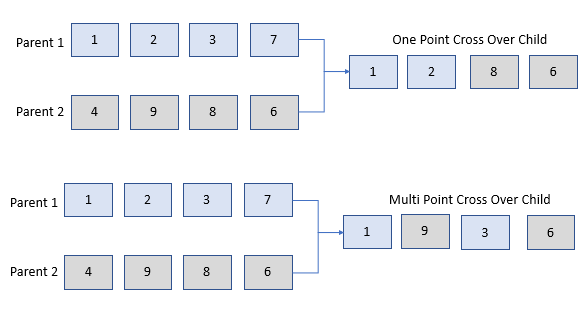

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
import warnings
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")


def split(df, label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te


classifiers = ['LinearSVM', 'RadialSVM',
               'Logistic', 'RandomForest',
               'AdaBoost', 'DecisionTree',
               'KNeighbors', 'GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter=1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state=0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df, label):
    Score = pd.DataFrame({"Classifier": classifiers})
    j = 0
    acc = []
    X_train, X_test, Y_train, Y_test = split(df, label)
    for i in models:
        model = i
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test, predictions))
        j = j + 1
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False, inplace=True)
    Score.reset_index(drop=True, inplace=True)
    return Score


def plot(score, x, y, c="b"):
    gen = [1, 2, 3, 4, 5]
    plt.figure(figsize=(6, 4))
    ax = sns.pointplot(x=gen, y=score, color=c)
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x, y))

In [9]:
def initilization_of_population(size, n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:, chromosome], Y_train)
        predictions = logmodel.predict(X_test.iloc[:, chromosome])
        scores.append(accuracy_score(Y_test, predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds, :][::-1])


def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0, len(pop_after_sel), 2):
        new_par = []
        child_1, child_2 = pop_nextgen[i], pop_nextgen[i + 1]
        new_par = np.concatenate((child_1[:len(child_1) // 2], child_2[len(child_1) // 2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for n in range(0, len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0, mutation_range):
            pos = randint(0, n_feat - 1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen


def generations(df, label, size, n_feat, n_parents, mutation_rate, n_gen, X_train,
                X_test, Y_train, Y_test):
    best_chromo = []
    best_score = []
    population_nextgen = initilization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation', i + 1, ':', scores[:1])  #2
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate, n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo, best_score

____
### Описание функций
#### 1. split():
Разбивает набор данных на обучающий и тестовый наборы.
#### 2. acc_score():
Возвращает точность для всех классификаторов.
#### 3. plot():
Для построения графика результатов.
_____
### Описание функций для генетического алгоритма
#### 1. initialization_of_population():
Для инициализации случайной популяции.
#### 2. fitness_score():
Возвращает лучших родителей вместе с их оценкой.
#### 3. selection():
Выбор лучших родителей.
#### 4. crossover():
Выбирает половину первого родителя и половину второго родителя.
#### 5. mutation():
Случайным образом переключает выбранные биты из дочернего элемента кроссовера.
#### 6. generations():
Выполняет все вышеуказанные функции для указанного количества поколений
____
### Используются следующие 3 набора данных:

1. Breast Cancer
2. Parkinson's Disease
3. PCOS
_____
### План действий:

1. Просмотр набора данных (небольшая предварительная обработка данных)
2. Проверка точности (сравнение точности с новым набором данных)
3. Визуализация
____

## Реализация генетического алгоритма для выбора признаков
________
-  Сначала мы запускаем функцию для инициализации случайной популяции.
- Рандомизированная популяция теперь прогоняется через функцию пригодности, которая возвращает наилучших родителей (наивысшая точность).
- Выбор из этих наилучших родительских элементов будет происходить в зависимости от параметра n-parent.
- После выполнения того же действия он будет передан через функции кроссовера и мутации соответственно.
- Кроссинговер создается путем объединения генов двух наиболее приспособленных родителей путем случайного выбора части первого родителя и части второго родителя.
- Мутация достигается случайным переключением выбранных битов для дочернего элемента кроссинговера.
- Новое поколение создается путем отбора наиболее приспособленных родителей из предыдущего поколения и применения скрещивания и мутации.
- Этот процесс повторяется в течение n поколений.
______

____
# Рак молочной железы
____

In [3]:
data_bc = pd.read_csv("Datasets/Breast Cancer Wisconsin/data.csv")
label_bc = data_bc["diagnosis"]
label_bc = np.where(label_bc == 'M', 1, 0)
data_bc.drop(["id", "diagnosis", "Unnamed: 32"], axis=1, inplace=True)

print("Breast Cancer dataset:\n", data_bc.shape[0], "Records\n", data_bc.shape[1], "Features")

Breast Cancer dataset:
 569 Records
 30 Features


In [6]:
data_bc.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2. Проверка точности

In [7]:
score1 = acc_score(data_bc, label_bc)
score1

,Classifier,Accuracy
0,RandomForest,0.972028
1,Logistic,0.965035
2,KNeighbors,0.965035
3,LinearSVM,0.958042
4,GradientBoosting,0.958042
5,RadialSVM,0.951049
6,AdaBoost,0.951049
7,DecisionTree,0.930070


#### Выбор наилучшего классификатора для дальнейших расчетов

In [10]:
logmodel = RandomForestClassifier(n_estimators=200, random_state=0)
X_train, X_test, Y_train, Y_test = split(data_bc, label_bc)
chromo_df_bc, score_bc = generations(data_bc, label_bc, size=80, n_feat=data_bc.shape[1], n_parents=64,
                                     mutation_rate=0.20, n_gen=5,
                                     X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

Best score in generation 1 : [0.986013986013986]
Best score in generation 2 : [0.986013986013986]
Best score in generation 3 : [0.993006993006993]
Best score in generation 4 : [0.993006993006993]
Best score in generation 5 : [0.993006993006993]


#### Мы видим улучшение примерно на 1%

### 3. Визуализация

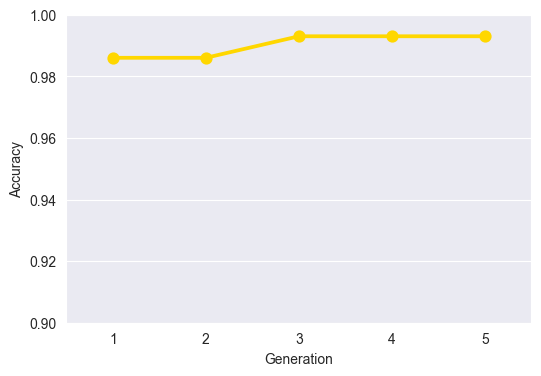

In [11]:
plot(score_bc, 0.9, 1.0, c="gold")

_____
# Болезнь Паркинсона
_____

In [12]:
data_pd = pd.read_csv("Datasets/Parkinsson disease.csv")
label_pd = data_pd["status"]
data_pd.drop(["status", "name"], axis=1, inplace=True)

print("Parkinson's disease dataset:\n", data_pd.shape[0], "Records\n", data_pd.shape[1], "Features")

Parkinson's disease dataset:
 195 Records
 22 Features


In [13]:
data_pd.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 2. Проверка точности

In [14]:
score3 = acc_score(data_pd, label_pd)
score3

,Classifier,Accuracy
0,RandomForest,0.918367
1,GradientBoosting,0.918367
2,Logistic,0.897959
3,LinearSVM,0.877551
4,AdaBoost,0.877551
5,DecisionTree,0.877551
6,RadialSVM,0.836735
7,KNeighbors,0.836735


In [15]:
logmodel = DecisionTreeClassifier(random_state=0)
X_train, X_test, Y_train, Y_test = split(data_pd, label_pd)
chromo_df_pd, score_pd = generations(data_pd, label_pd, size=80, n_feat=data_pd.shape[1], n_parents=64,
                                     mutation_rate=0.20, n_gen=5,
                                     X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

Best score in generation 1 : [0.9591836734693877]
Best score in generation 2 : [0.9795918367346939]
Best score in generation 3 : [0.9591836734693877]
Best score in generation 4 : [0.9795918367346939]
Best score in generation 5 : [0.9591836734693877]


#### Мы видим улучшение на 2-3%

### 3. Визуализация

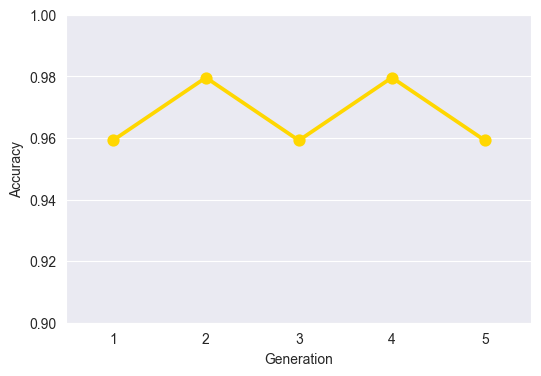

In [16]:
plot(score_pd, 0.9, 1.0, c="gold")

____
# PCOS
____

In [18]:
data_pcos = pd.read_csv("Datasets/PCOS_data.csv")
label_pcos = data_pcos["PCOS (Y/N)"]
data_pcos.drop(["Sl. No", "Patient File No.", "PCOS (Y/N)", "Unnamed: 44", "II    beta-HCG(mIU/mL)", "AMH(ng/mL)"],
               axis=1, inplace=True)
data_pcos["Marraige Status (Yrs)"].fillna(data_pcos['Marraige Status (Yrs)'].describe().loc[['50%']][0], inplace=True)
data_pcos["Fast food (Y/N)"].fillna(1, inplace=True)

print("PCOS dataset:\n", data_pcos.shape[0], "Records\n", data_pcos.shape[1], "Features")

PCOS dataset:
 541 Records
 39 Features


In [19]:
data_pcos.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.5,24.9,15,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.0,25.3,11,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.0,29.7,13,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.0,20.1,11,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


### 2. Сверка точности

In [20]:
score4 = acc_score(data_pcos, label_pcos)
score4

,Classifier,Accuracy
0,RandomForest,0.889706
1,Logistic,0.860294
2,AdaBoost,0.860294
3,GradientBoosting,0.860294
4,LinearSVM,0.852941
5,DecisionTree,0.838235
6,RadialSVM,0.698529
7,KNeighbors,0.676471


In [21]:
logmodel = RandomForestClassifier(n_estimators=200, random_state=0)
X_train, X_test, Y_train, Y_test = split(data_pcos, label_pcos)
chromo_df_pcos, score_pcos = generations(data_pcos, label_pcos, size=80, n_feat=data_pcos.shape[1], n_parents=64,
                                         mutation_rate=0.20, n_gen=5,
                                         X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

Best score in generation 1 : [0.9117647058823529]
Best score in generation 2 : [0.9117647058823529]
Best score in generation 3 : [0.9117647058823529]
Best score in generation 4 : [0.9191176470588235]
Best score in generation 5 : [0.9191176470588235]


#### Мы видим улучшение на 0.1%

### 3. Визуализация

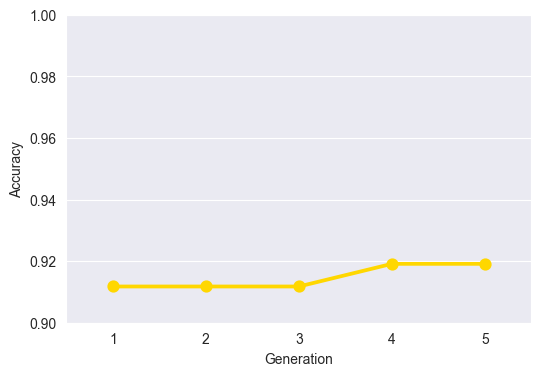

In [22]:
plot(score_pcos, 0.9, 1.0, c="gold")